In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import xesmf as xe

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [2]:
ds_era5=xr.open_dataset("/groups/EXTREMES/cutouts/europe-1989-era5.nc")
ds_era5

<xarray.Dataset> Size: 17GB
Dimensions:           (x: 189, y: 157, time: 8760)
Coordinates:
  * x                 (x) float64 2kB -12.0 -11.75 -11.5 ... 34.5 34.75 35.0
  * y                 (y) float64 1kB 33.0 33.25 33.5 33.75 ... 71.5 71.75 72.0
  * time              (time) datetime64[ns] 70kB 1989-01-01 ... 1989-12-31T23...
    lon               (x) float64 2kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    height            (y, x) float32 119kB ...
    wnd100m           (time, y, x) float32 1GB ...
    wnd_azimuth       (time, y, x) float32 1GB ...
    roughness         (time, y, x) float32 1GB ...
    influx_toa        (time, y, x) float32 1GB ...
    influx_direct     (time, y, x) float32 1GB ...
    ...                ...
    albedo            (time, y, x) float32 1GB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 1GB ...
Attributes:
    module:             era5
    prepared_features:  ['wind', 'runoff', 'temperature', 'height', 'influx']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-02-20 09:56:05 GMT by grib_to_netcdf-2.25.1: /op...

In [4]:
ds_canesm5=xr.open_dataset("/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1989.nc")
ds_canesm5

<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 1989-01-01 01:30:00 ... 1989-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   12/03/2025 14:04

In [12]:
ds1x1=xr.open_dataset('/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe_1x1.nc')

In [ ]:
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_cmip
rsds_era5_mean= read_and_average_era5_marta('influx_direct')
rsds_model_mean= read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/', 'rsds')

['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

In [11]:
rsds_era5_mean_cut=rsds_era5_mean.sel(x=slice(-12, 35), y=slice(33, 72))
rsds_model_mean_cut=rsds_model_mean.sel(lon=slice(-12, 35), lat=slice(33, 72))

In [13]:
from regridding_functions import regrid
regridder_era5=regrid(rsds_era5_mean_cut, ds1x1, method='conservative') #regrid erra5 to the 1ºx1º grid


189 190
157 158
48 49
40 41


In [14]:
regridder_era5

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_157x189_40x48.nc 
Reuse pre-computed weights? False 
Input grid shape:           (157, 189) 
Output grid shape:          (40, 48) 
Periodic in longitude?      False

In [15]:
rsds_era5_mean_interp_cut=regridder_era5(rsds_era5_mean_cut)
rsds_era5_mean_interp_cut

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<astype, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
Attributes:
    regrid_method:  conservative

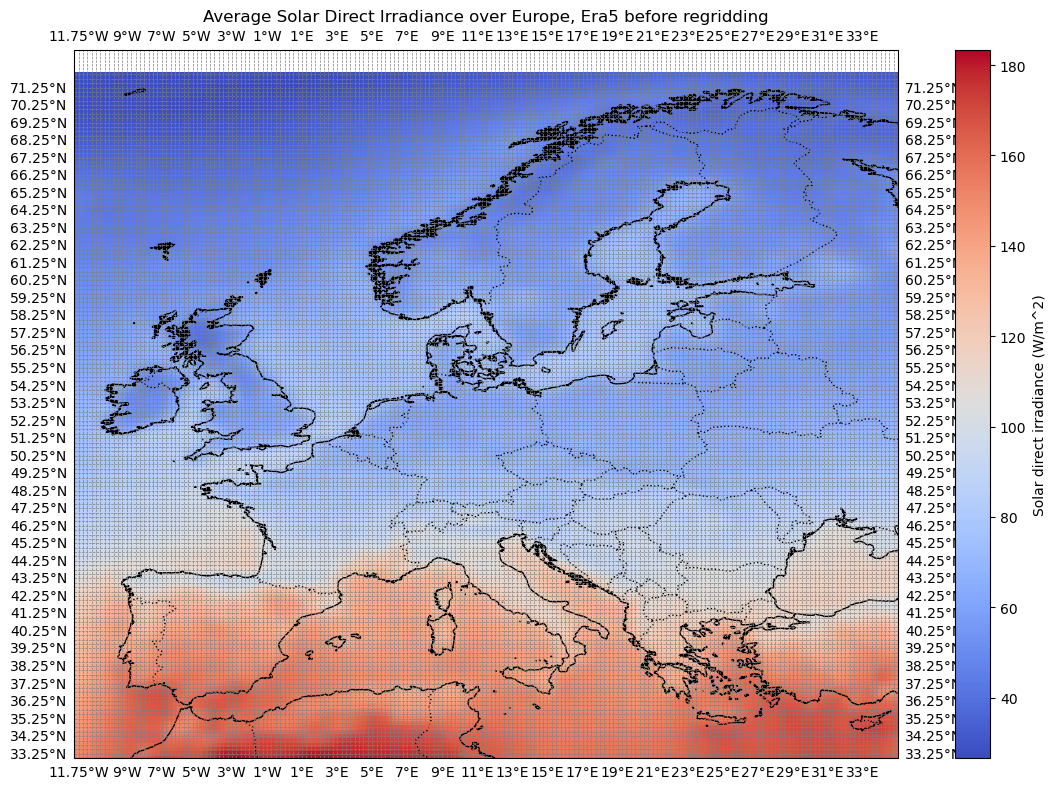

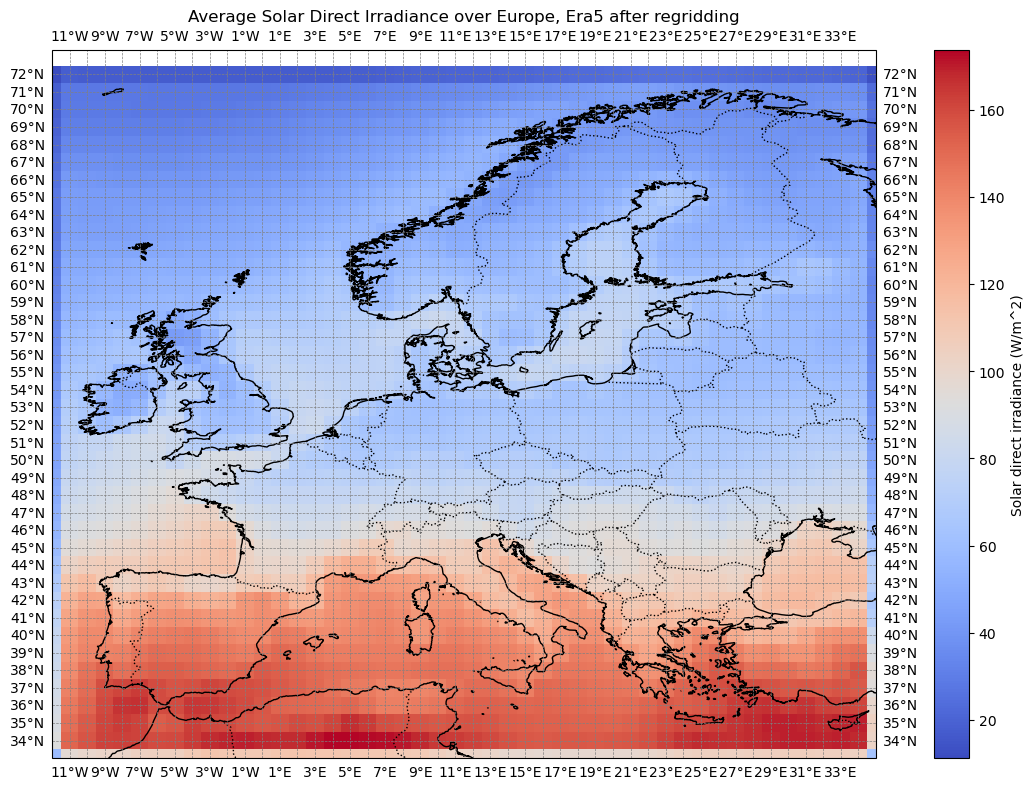

In [16]:
# Extract the longitude and latitude from the datasets
lon_era5 = rsds_era5_mean_cut.lon
lat_era5 = rsds_era5_mean_cut.lat
lon_era5_interp_cut = rsds_era5_mean_interp_cut.lon
lat_era5_interp_cut = rsds_era5_mean_interp_cut.lat

# Create the figure for rsds_era5_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsds_era5_mean (Before Regridding)')
rsds_era5_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5, ylocs=lat_era5, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_era5.min(), lon_era5.max(), lat_era5.min(), lat_era5.max()])

# Show the first plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_era5_mean_interp (After Regridding)')
rsds_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp_cut, ylocs=lat_era5_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp_cut.min(), lon_era5_interp_cut.max(), lat_era5_interp_cut.min(), lat_era5_interp_cut.max()]) #I choose the smaller coordinate range from Era5

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()

In [20]:
from regridding_functions import regrid
regridder_model=regrid(rsds_model_mean_cut, ds1x1, method='bilinear') #regrid erra5 to the 1ºx1º grid
regridder_model

17 18
14 15
48 49
40 41


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_14x17_40x48.nc 
Reuse pre-computed weights? False 
Input grid shape:           (14, 17) 
Output grid shape:          (40, 48) 
Periodic in longitude?      False

In [21]:
rsds_model_mean_interp_cut=regridder_model(rsds_model_mean_cut)
rsds_model_mean_interp_cut

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('lat', 'lon') from data variable rsds as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<astype, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
Attributes:
    regrid_method:  bilinear

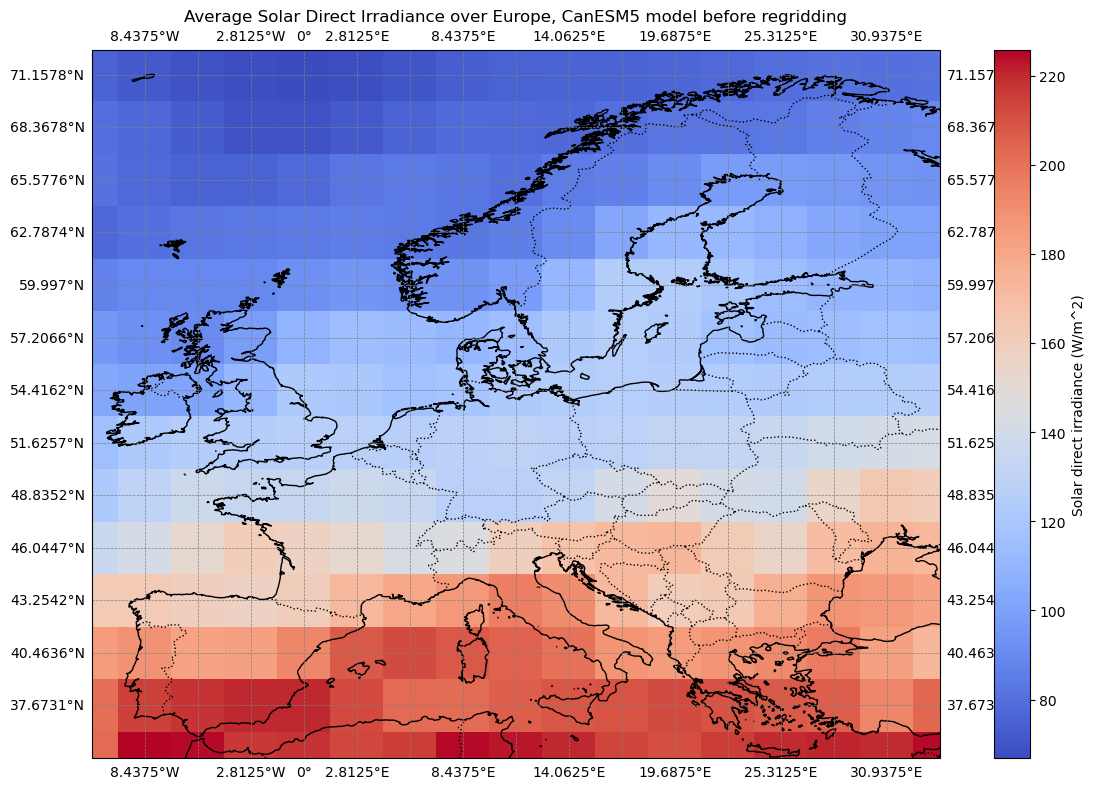

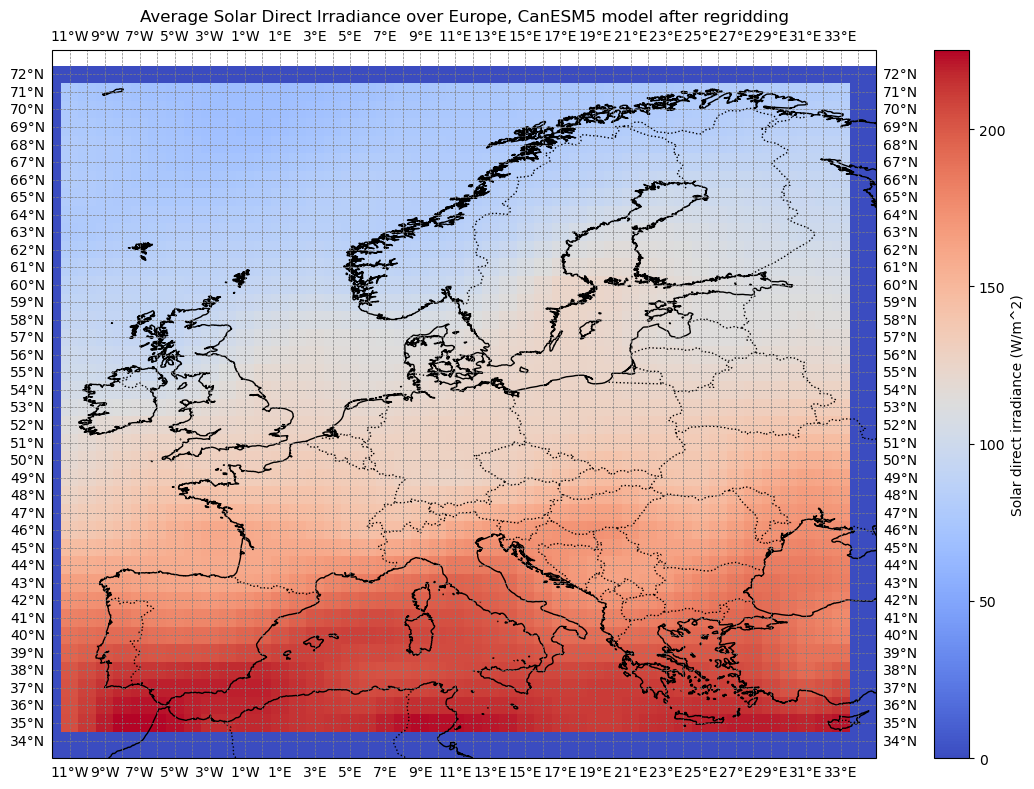

In [22]:
# Extract the longitude and latitude from the datasets
lon_model = rsds_model_mean_cut.lon
lat_model = rsds_model_mean_cut.lat
lon_model_interp_cut = rsds_model_mean_interp_cut.lon
lat_model_interp_cut = rsds_model_mean_interp_cut.lat

# Create the figure for rsds_model_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsds_model_mean (Before Regridding)')
rsds_model_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_model, ylocs=lat_model, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_model.min(), lon_model.max(), lat_model.min(), lat_model.max()])

# Show the first plot
plt.title(f'Average Solar Direct Irradiance over Europe, CanESM5 model before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_model_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_model_mean_interp (After Regridding)')
rsds_model_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_model_interp_cut, ylocs=lat_model_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_model_interp_cut.min(), lon_model_interp_cut.max(), lat_model_interp_cut.min(), lat_model_interp_cut.max()]) #I choose the smaller coordinate range from model

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, CanESM5 model after regridding')
plt.tight_layout()
plt.show()